# Exercícios da Aula 04 - Filtragem
### Samuel Felipe dos Santos

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from math import exp
import os
from sklearn.preprocessing import normalize

#### **Ex 1:**

● **Implemente a operação de correlação e procure a posição mais semelhante que uma determinada janela ocorre dentro de uma imagem grande.**

A seguir é implementado uma função de padding com zeros necessária para a execução da função de correlação, a função de soma usada após a multiplicação de um trecho da imagem pela máscara pela correlação e a função de correlação

In [2]:
#Implementação de padding com zeros utilizado pela função de correlação 
def pad(image, u,d,l,r):
    paded_image = np.zeros([image.shape[0]+u+d, image.shape[1]+l+r])
    paded_image[u:paded_image.shape[0]-d, l:paded_image.shape[1]-r] = image
    return paded_image

#Implementação da função de correlação entre uma imagem e uma mascara
def correlation(image, mask, function=np.sum):
    u = int(mask.shape[0]/2)
    d = mask.shape[0]-1-u
    l = int(mask.shape[1]/2)
    r = mask.shape[1]-1-l
    
    img_shape = image.shape
    p_image = pad(image, u, d, l, r)
    
    out = np.zeros(img_shape[:2])
    for i in range(u, u+img_shape[0]-1):
        for j in range(l, l+img_shape[1]-1):
            out[i-u,j-l] = function( mask *  p_image[ i-u :i+1+d, j-l:j+1+r ] )
    return out

Uma imagem em tons de cinza é aberta, sendo escolhida uma janela e calculada a correlação entre a imagem e a janela

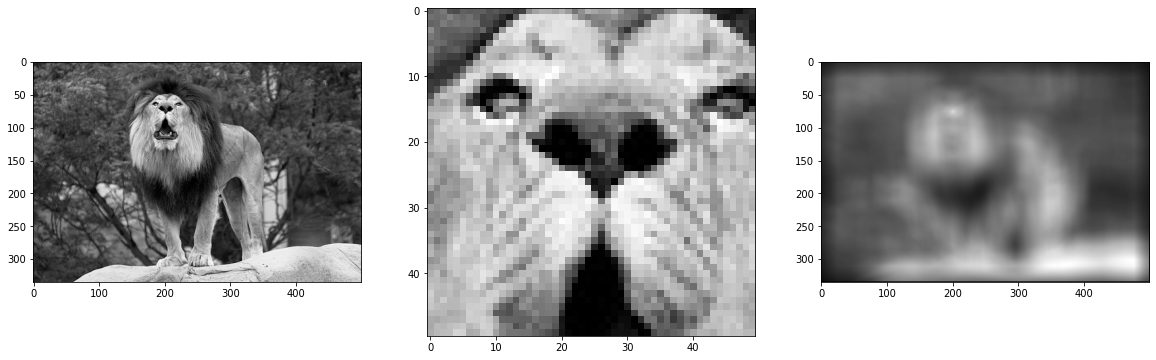

In [36]:
#imagem em tons de cinza é aberta
grayimg = cv.imread('lion.jpg', 0)

#É mostrado (primeira ilustração a esquerda) a imagem original em tons de cinza 
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(grayimg, cmap='gray')

#É escolhido uma janela, que é mostrada na elustração do meio
msk_windown_i = [50,100]
msk_windown_j = [175,225]

#A função de correlação é aplicada sobre a imagem utilizando a janela como mascara,
#resultando na ilustração a direita
msk = grayimg[msk_windown_i[0]:msk_windown_i[1], msk_windown_j[0]:msk_windown_j[1]]
fig.add_subplot(1, 3, 2)
plt.imshow(msk, cmap='gray')

correlation_img_msk = correlation(grayimg, msk)
fig.add_subplot(1, 3, 3)
plt.imshow(correlation_img_msk, cmap='gray')

É procurado então, na imagem resultante da correlação, o valor mais alto, pois ele deve indicar o centro da região mais similar a janela.

As ilustrações mostram a janela utilizada na correlação, e a região mais similar encontrada. Como pode ser visto, o método não foi bem sucedido, sendo encontrada uma região diferente.

max center: (302, 474)
max_windown: [277, 327] [449, 499]
msk_windown: [50, 100] [175, 225]
265805
312978


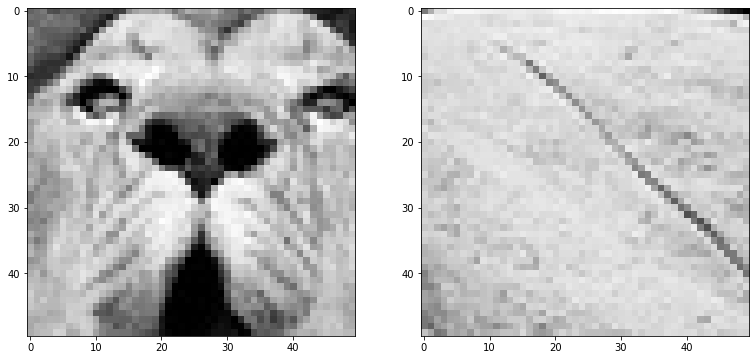

In [37]:
max_center = np.unravel_index(correlation_img_msk.argmax() , correlation_img_msk.shape)
max_windown_i = [ max_center[0]-25,max_center[0]+25]
max_windown_j = [ max_center[1]-25,max_center[1]+25]
print('max center:', max_center)
print('max_windown:', max_windown_i, max_windown_j)
print('msk_windown:', msk_windown_i, msk_windown_j)

print(np.sum(msk*msk))
print(np.sum(msk* grayimg[max_windown_i[0]:max_windown_i[1], max_windown_j[0]:max_windown_j[1] ]))

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(msk, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(grayimg[max_windown_i[0]:max_windown_i[1], max_windown_j[0]:max_windown_j[1]], cmap='gray')

Para tentar resolver esse problema, foram implementadas as funções a seguir.
A primeira faz com que os valores da imagem variem entre os parametros img_min e img_max, e a segunda subtrai o valor da média dos pixels e divide pelo desvio padrão.

In [3]:
def rescale(img, img_min, img_max):
    mn = img.min()
    mx = img.max()
    return ((img-mn)/(mx-mn)*(img_max-img_min) + img_min)

def standardize(img, mean, std):
    return (img-mean)/std

Essas operações de normalização foram aplicadas a imagem, sendo calculada novamente sua correlação, sendo procurado o ponto de intensidade máxima no resultado.

Na primeira coluna, a primeira ilustração mostra a imagem após a normalização, a segunda mostra a janela, e a terceira mostra o resultado da correlação.

Na segunda coluna, é mostrado a janela usada na correlação, e a região mais similar encontrada, como pode ser visto, o método foi bem sucedido, pois as imagens são iguais.

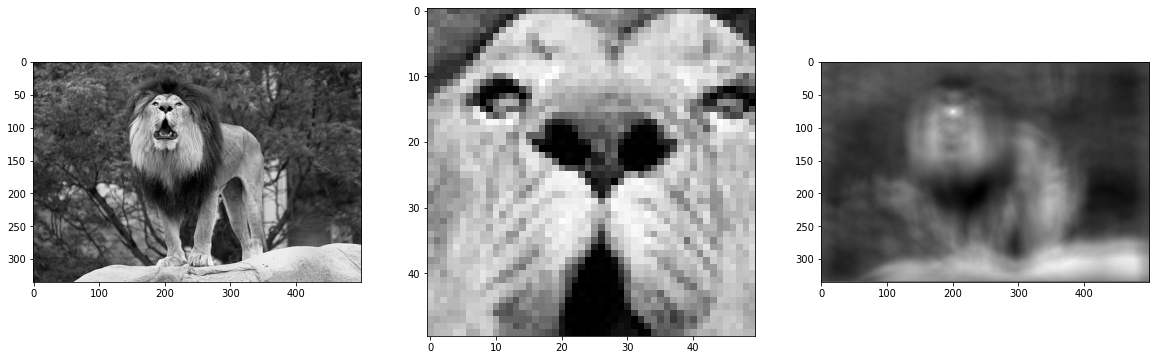

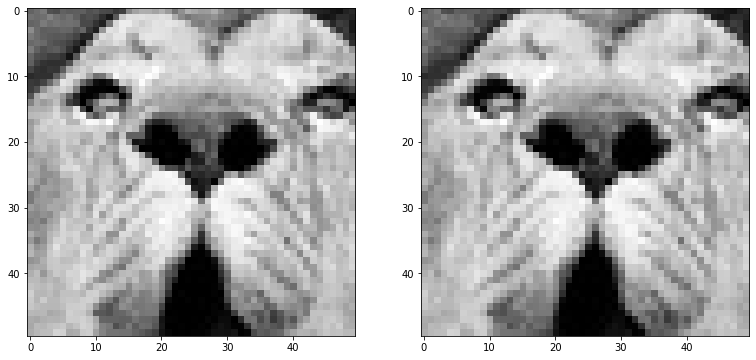

In [39]:
#imagem é aberta e normalizada
grayimg = cv.imread('lion.jpg', 0)
n_img = rescale(grayimg, 0, 255).astype('uint8')
n_img = standardize(n_img, n_img.mean(), n_img.std())

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(n_img, cmap='gray')

#É selecionada uma janela
n_msk = n_img[msk_windown_i[0]:msk_windown_i[1], msk_windown_j[0]:msk_windown_j[1]]
fig.add_subplot(1, 3, 2)
plt.imshow(n_msk, cmap='gray')

#É realizada a operação de correlação entre a imagem normalizada e a janela
co_img_msk_normalized = correlation(n_img, n_msk)
fig.add_subplot(1, 3, 3)
plt.imshow(co_img_msk_normalized, cmap='gray')

#É encontrado o ponto de intensidade maxima no resultado da correlação, que é o centro da
#da região mais similar
max_center = np.unravel_index(co_img_msk_normalized.argmax() , co_img_msk_normalized.shape)
max_windown_i = [ max_center[0]-25,max_center[0]+25]
max_windown_j = [ max_center[1]-25,max_center[1]+25]

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(n_msk, cmap='gray')
fig.add_subplot(1, 3, 2)
plt.imshow(n_img[max_windown_i[0]:max_windown_i[1], max_windown_j[0]:max_windown_j[1]], cmap='gray')

#### Ex 2:

**● Pesquise e implemente o filtro de suavização gaussiano**

**● Baixe a base de imagens de células do link abaixo. Depois tente fazer
limiarizações para separar as células do fundo**

**–** http://www.cellimagelibrary.org/pages/project_20269

**– Pode usar subconjunto aleatório (100 imagens neste exercício)**

**● Tente usar filtros de suavização para melhorar os resultados e deixar as
células com o mínimo de componentes possíveis.**

**– Faça o teste com:**

**● 4 filtros diferentes**

**– Caso seja necessário um filtro muito grande para ver alterações, reduza a resolução da imagem para menos de
1000x1000 pixels.**

**● 3 tamanhos de janela para cada filtro**

**– Comparar resultados dos filtros sobre todas imagens**

**– Qual filtro você escolheria para a base? Justifique.**

Abaixo foram implementados três kernel que serão utilizados nos experimentos, gaussiano, média e um kernel com todos valores igual a 1.

In [4]:
def gaussian_kernel(shape, std):
    center = [int(shape[0]/2),int(shape[0]/2)]
    out = np.zeros(shape[:2])
    for i in range(shape[0]):
        for j in range(shape[1]):
            out[i,j] = (1.0/(2.0*pi*std**2))*exp(-(((i-center[0])**2+(j-center[1])**2 )/(2.0*std**2)))
    return out

def mean_kernel(shape, std):
    out = np.ones(shape[:2])
    return out/out.size

def ones_kernel(shape, std):
    return np.ones(shape[:2])

Inicialmente foi aplicado o limiar de Otsu nas imagens sem nenhum filtro, para posteriormente ser possível conferir as vantagens da aplicação do filtro.

In [ ]:
i=0
for img_path in image_list:
    print('Image: '+img_path)

    img = cv.imread(os.path.join('BBBC022_v1_images_20585w1',img_path),0)
    img = rescale(img, 0, 255)
    ret, t_img = cv.threshold(img.astype('uint8'), 0, 255, cv.THRESH_OTSU)
    
    plt.imsave('data/aula04/'+str(i)+'_thresh.png', t_img, cmap='gray')
    
    t_img = t_img/255 * img

    plt.imsave('data/aula04/'+str(i)+'_nimgThresh.png', t_img, cmap='gray')
    
    i+=1

Serão utilizados quatro filtros nos experimentos: média, mediana, máximo e gaussiano

Cada um com 3 tamanhos de kernel: 3x3, 9x9, 15x15

Como pode ser visto no código abaixo, o experimento foi realizado na base de dados de células Human U2OS cells, sendo escolhidos 100 imagens aleatórias.

In [5]:
image_list = list(os.listdir('BBBC022_v1_images_20585w1'))
np.random.seed(100)
np.random.shuffle(image_list)
image_list = image_list[0:100]

O código abaixo foi utilizado para realizar os experimentos, nele os 4 filtros com 3 tamanhos diferentes de kernel são utilizados.

Inicialmente um filtro é utilizado para suavizar a imagem, e em seguida, é realizado a limiarização da imagem.

In [ ]:
i=0
for img_path in image_list:
    print('Image: '+img_path)

    img = cv.imread(os.path.join('BBBC022_v1_images_20585w1',img_path),0)
    img = rescale(img, 0, 255)
    
    img_mean = img.mean()
    img_std  = img.std()
    
    
    plt.imsave('data/aula04/'+str(i)+'_nimg.png', img, cmap='gray')
    print('img:',img.min(), img.max())
    filters = []

    mean_filter     = (mean_kernel    , np.sum   , 'mean')
    median_filter   = (ones_kernel    , np.median, 'median')
    max_filter      = (ones_kernel    , np.max   , 'max')
    gaussian_filter = (gaussian_kernel, np.sum,    'gaussian')

    for filters in [ mean_filter, median_filter, max_filter, gaussian_filter ]:
        for kernel_size in [[3,3],[9,9],[15,15]]:
            print('... filter: '+filters[2]+'   kernel size: ' + str(kernel_size) )
            msk = filters[0](kernel_size,img_std) 
            smooth_img = correlation( img, msk, function=filters[1] )
            smooth_img = rescale(smooth_img, 0, 255)
            plt.imsave('data/aula04/'+str(i)+'_corr_'+filters[2]+'_'+str(kernel_size)
                       +'.png', smooth_img, cmap='gray')
            
            ret, t_img = cv.threshold(smooth_img.astype('uint8'), 0, 255, cv.THRESH_OTSU)

            plt.imsave('data/aula04/'+str(i)+'_tresh_'+filters[2]+'_'+str(kernel_size)
                       +'.png', t_img, cmap='gray')

            t_img = t_img/255 * img
            
            plt.imsave('data/aula04/'+str(i)+'_nimgTresh_'+filters[2]+'_'+str(kernel_size)
                       +'.png', t_img, cmap='gray')

    i+=1

Para realizar uma avaliação quantitativa dos resultados, foi analisado a entropia das imagens geradas pelos diferentes métodos.

Quanto mais alta a entropia, mais irregular a imagem analisada é, por esse motivo, a ideia inicial seria escolher os filtros com menor entropia.

A Tabela abaixo é apresenta a média da entropia das 100 imagens limiarizadas pelos diferentes métodos, assim como o desvio padrão.

Como pode ser visto, os filtros de mediana com maior valor de kernel obtiveram os valores mais baixos de entropia, seguidos da imagem original, filtros de média, gaussiano e máximo.

Aparentemente, os métodos que conseguiram baixa entropia foram os que geraram formas pequenas e uniformes.

In [25]:
from skimage.measure import shannon_entropy
import pandas as pd
from IPython.display import display, HTML

def entropy_average_std( path, sufix ):
    entropy = np.zeros(100).astype('float')
    for i in range(100):
        img_path = os.path.join(path, str(i)+sufix)
        img = cv.imread( img_path ,0)
        entropy[i] = shannon_entropy(img)
    return entropy.mean(), entropy.std()

entr = entropy_average_std( 'data/aula04/OTSUoriginal', '_thresh.png')

names = [ 'original' ]
kernels = [ [] ]
entropy_mean = [ entr[0] ]
entropy_std  = [ entr[1] ]

for filters in [ 'mean', 'median', 'max', 'gaussian' ]:
    for kernel_size in [[3,3],[9,9],[15,15]]:
        entr = entropy_average_std( 'data/aula04/suavização', 
                                   '_tresh_'+filters+'_'+str(kernel_size)+'.png')
        
        names += [ filters ]
        kernels += [ kernel_size ]
        entropy_mean += [ entr[0] ]
        entropy_std  += [ entr[1] ]

data = {
    'filtro' : names,
    'kernel' : kernels,
    'média'  : entropy_mean,
    'd. padrão' : entropy_std
}

df = pd.DataFrame.from_dict(data)

display(df.sort_values(by='média'))

,filtro,kernel,média,d. padrão
6,median,"[15, 15]",0.613303,0.137767
5,median,"[9, 9]",0.635824,0.142925
4,median,"[3, 3]",0.650484,0.143345
0,original,[],0.652198,0.143391
2,mean,"[9, 9]",0.692476,0.144630
11,gaussian,"[9, 9]",0.692540,0.144682
1,mean,"[3, 3]",0.692994,0.147471
10,gaussian,"[3, 3]",0.693115,0.147346
12,gaussian,"[15, 15]",0.712544,0.142078
3,mean,"[15, 15]",0.713232,0.141976


Abaixo será realizada uma análise qualitativa dos resultados, analisando a limiarização de algumas imagens do conjunto de dados.

Foram escolhidas quatro imagens, sendo elas as de número 3, 8, 65 e 82.

Nas ilustrações, para cada uma das imagens escolhidas, as linhas representam:
- Primeira linha:  imagem original
- Segunda linha: imagem original limiarizada
- Terceira linha: limiarização da imagem suavizada com filtro de média
- Quarta linha: limiarização da imagem suavizada com filtro de mediana
- Quinta linha: limiarização da imagem suavizada com filtro de máximo
- Terceira linha: limiarização da imagem suavizada com filtro Gaussiano

As colunas representam os tamanhos de kernel:
-  Primeira coluna: kernel 3x3
-  Primeira coluna: kernel 9x9
-  Primeira coluna: kernel 15x15


Em relação ao tipo de filtro, o de média, mediana e gaussiano obtiveram resultados similares, enquanto o de máximo aparenta ter obtido resultados piores, pois acabou gerando regiões muito grande, juntando diferentes células, principalmente para kernels maiores.

Em relação ao tamanho do kernels, de forma geral, quanto maior, mais detalhes da imagens são removidos, gerando formas mais silmples (por esse motivo, a entropia é menor), no entanto, maiores tamanhos de kernel fazem com que células diferentes se juntem.   

Eu definiria o filtro de mediana com kernel 9x9 como o melhor, pois gerou formas mais simples e uniformes, destacando a forma geral da célula, ao mesmo tempo, não juntou muitas céluas.

In [52]:
def plot_figs(j):
    fig = plt.figure(figsize=(20, 30))

    i=1
    img = cv.imread( 'data/aula04/Original/'+str(j)+'_nimg.png' ,0)
    fig.add_subplot(6, 3, i)
    plt.imshow(img, cmap='gray')
    i+=3

    img_path = 'data/aula04/OTSUoriginal/'+str(j)+'_thresh.png'
    img = cv.imread( img_path ,0)
    fig.add_subplot(6, 3, i)
    plt.imshow(img, cmap='gray')
    i+=3

    for filters in [ 'mean', 'median', 'max', 'gaussian' ]:
        for kernel_size in [[3,3],[9,9],[15,15]]:

            img_path = 'data/aula04/suavização/'+str(j)+'_tresh_'+filters+'_'+str(kernel_size)+'.png'
            img = cv.imread( img_path ,0)
            fig.add_subplot(6, 3, i)
            plt.imshow(img, cmap='gray')
            i+=1

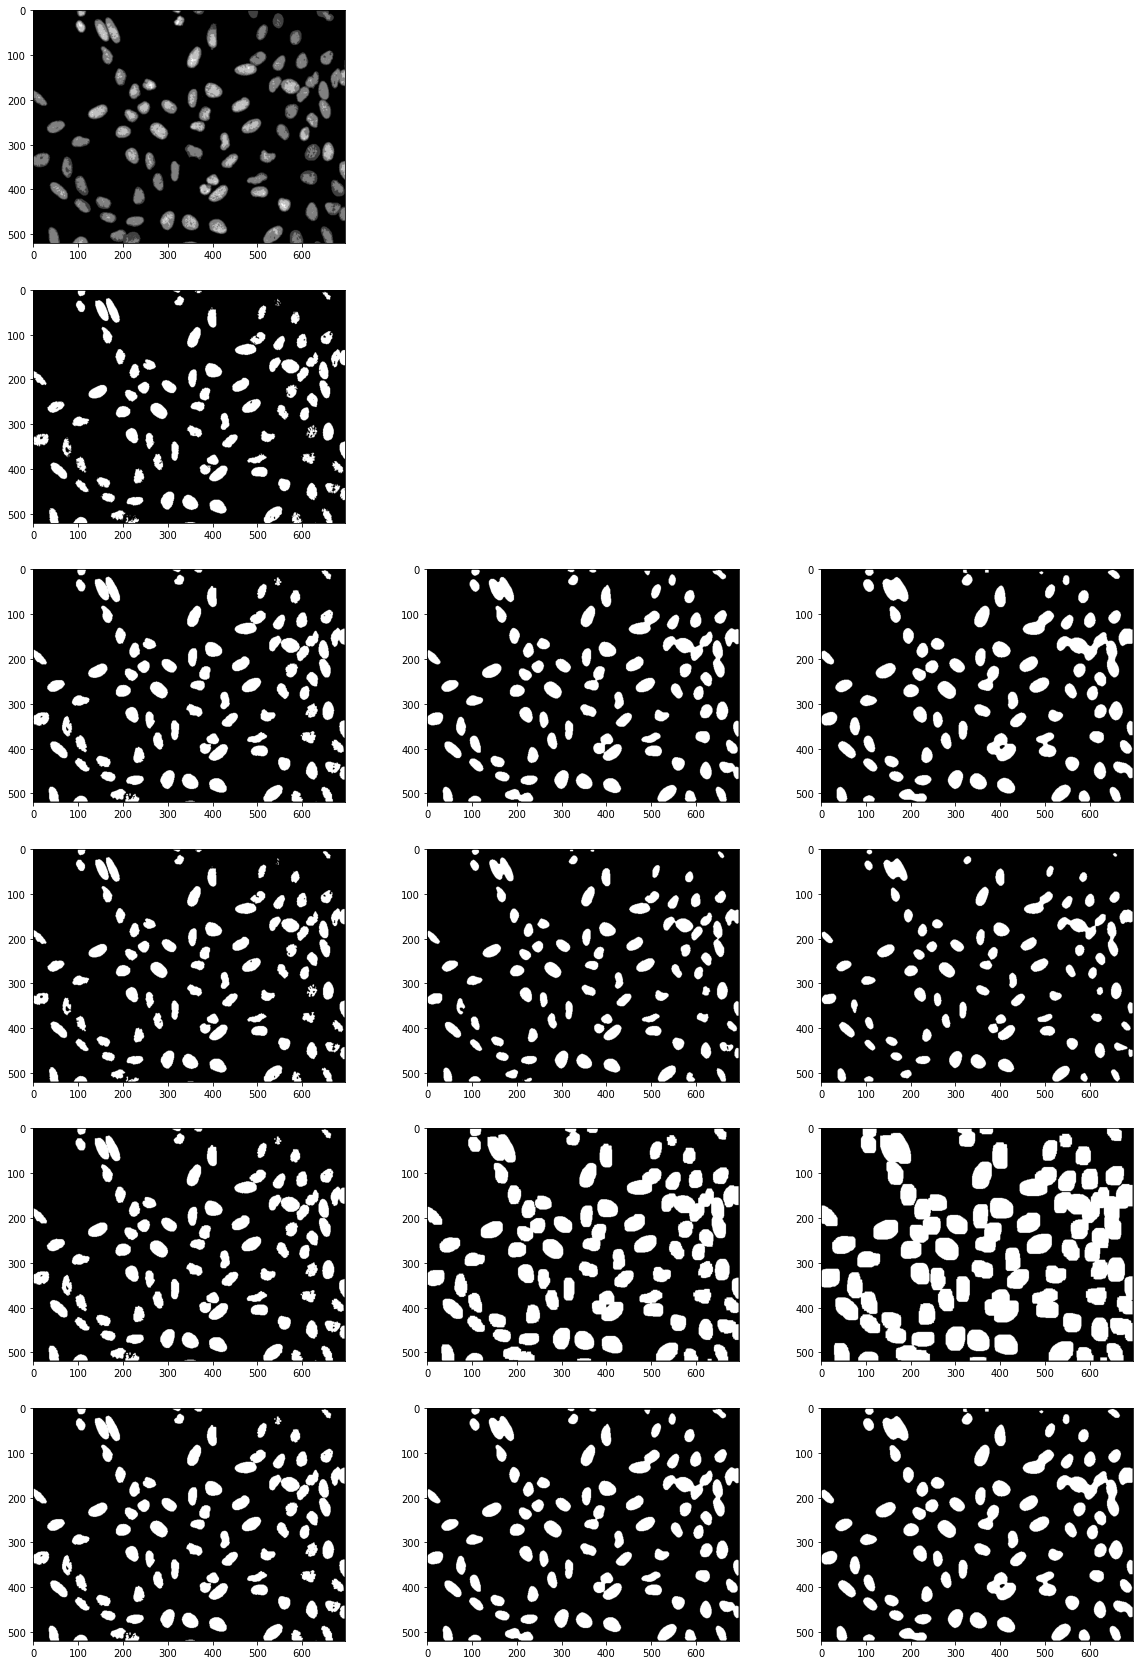

In [53]:
plot_figs(3)

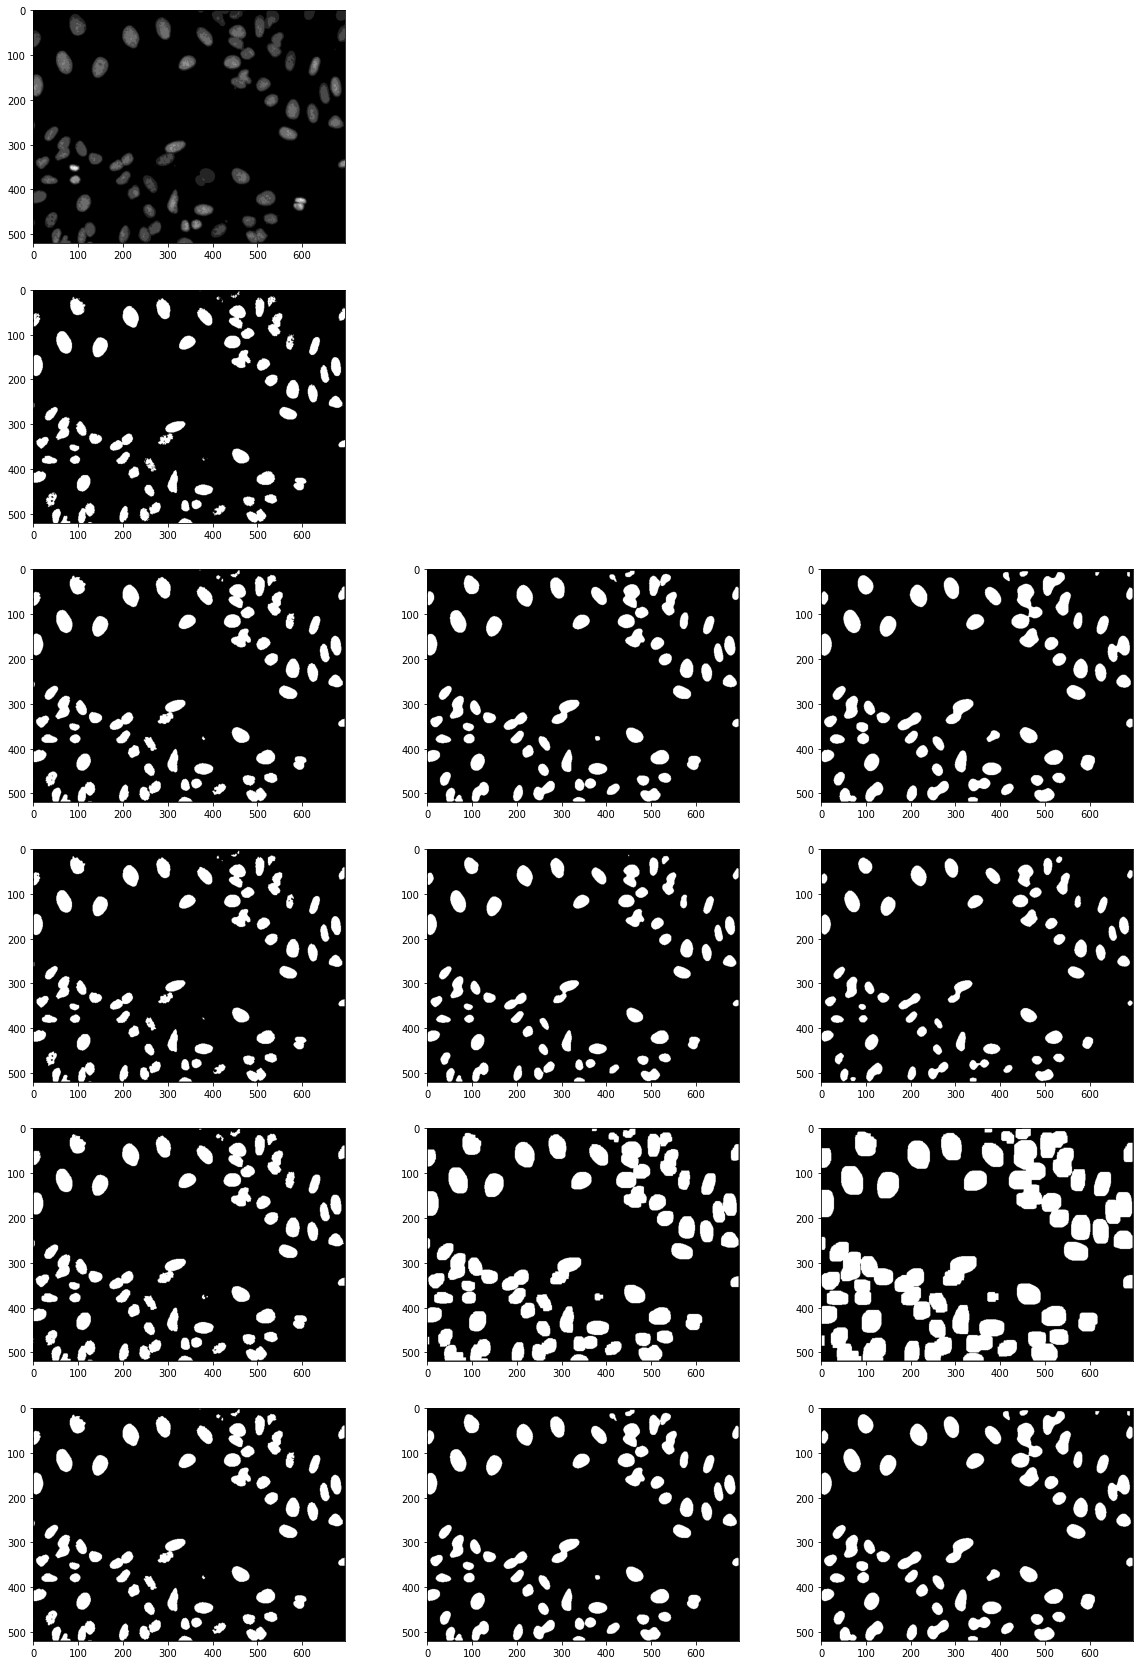

In [54]:
plot_figs(8)

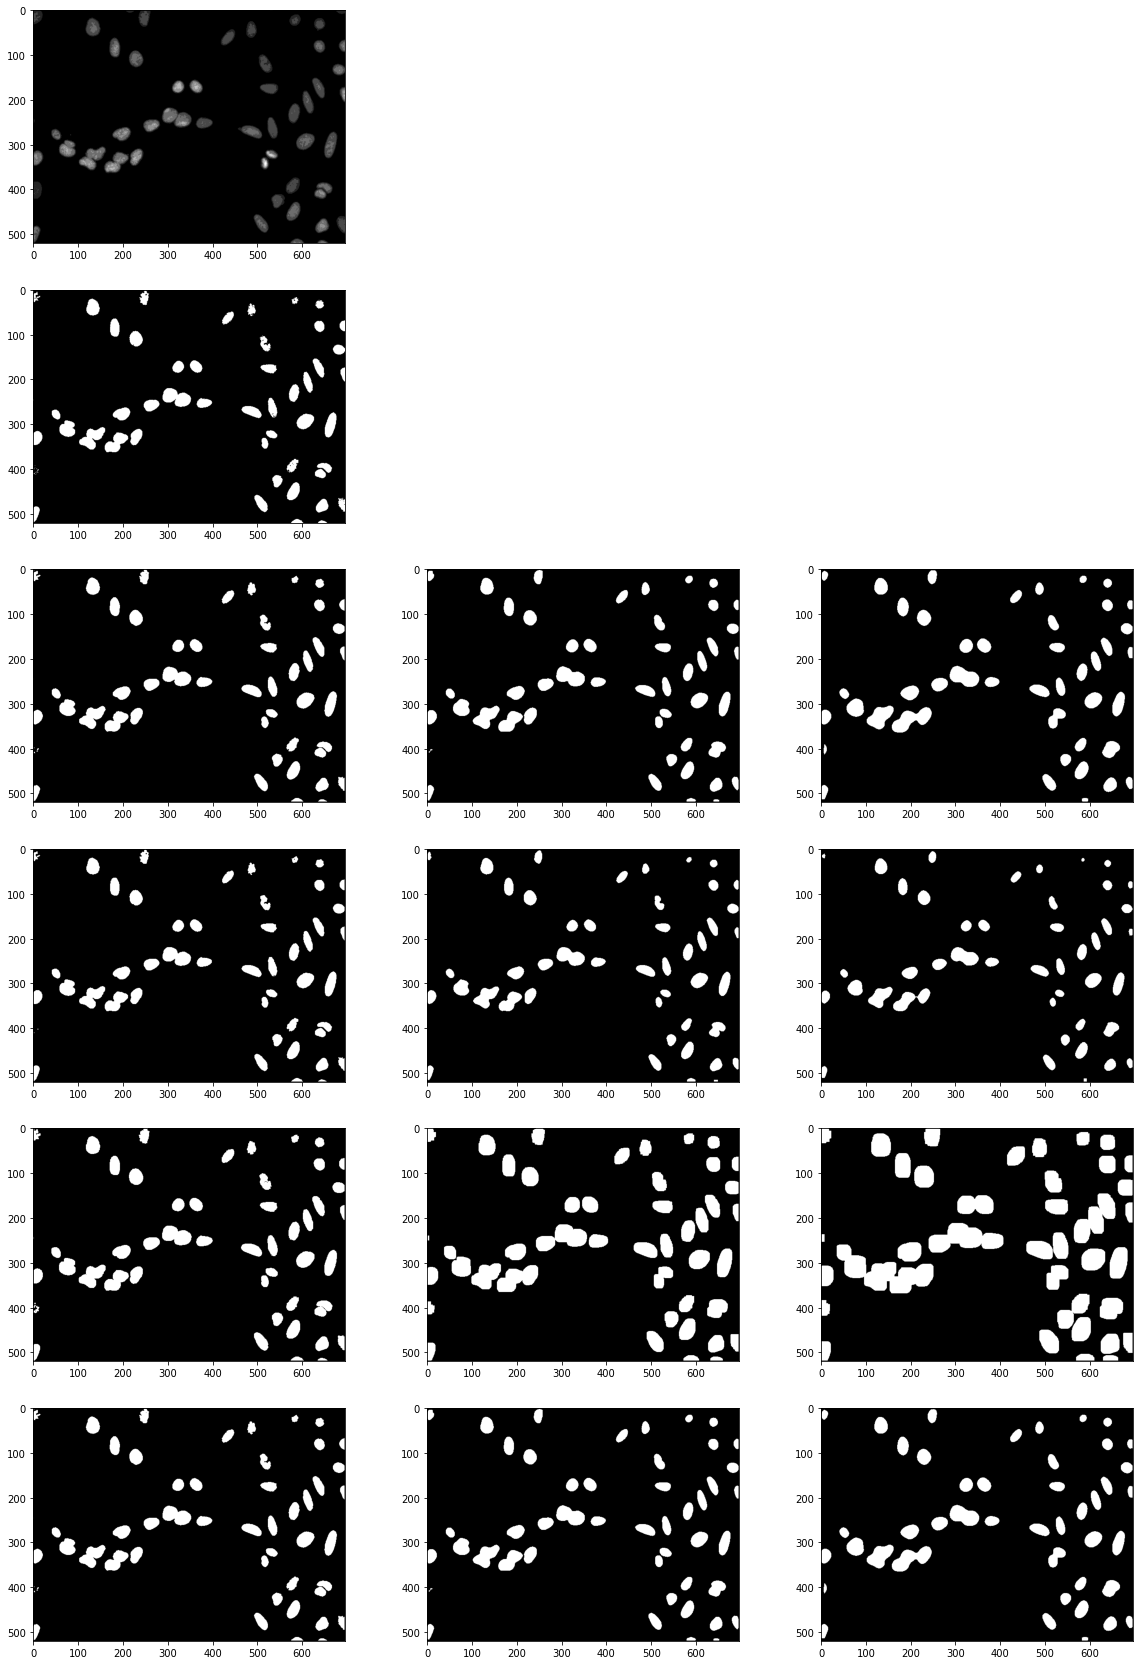

In [55]:
plot_figs(65)

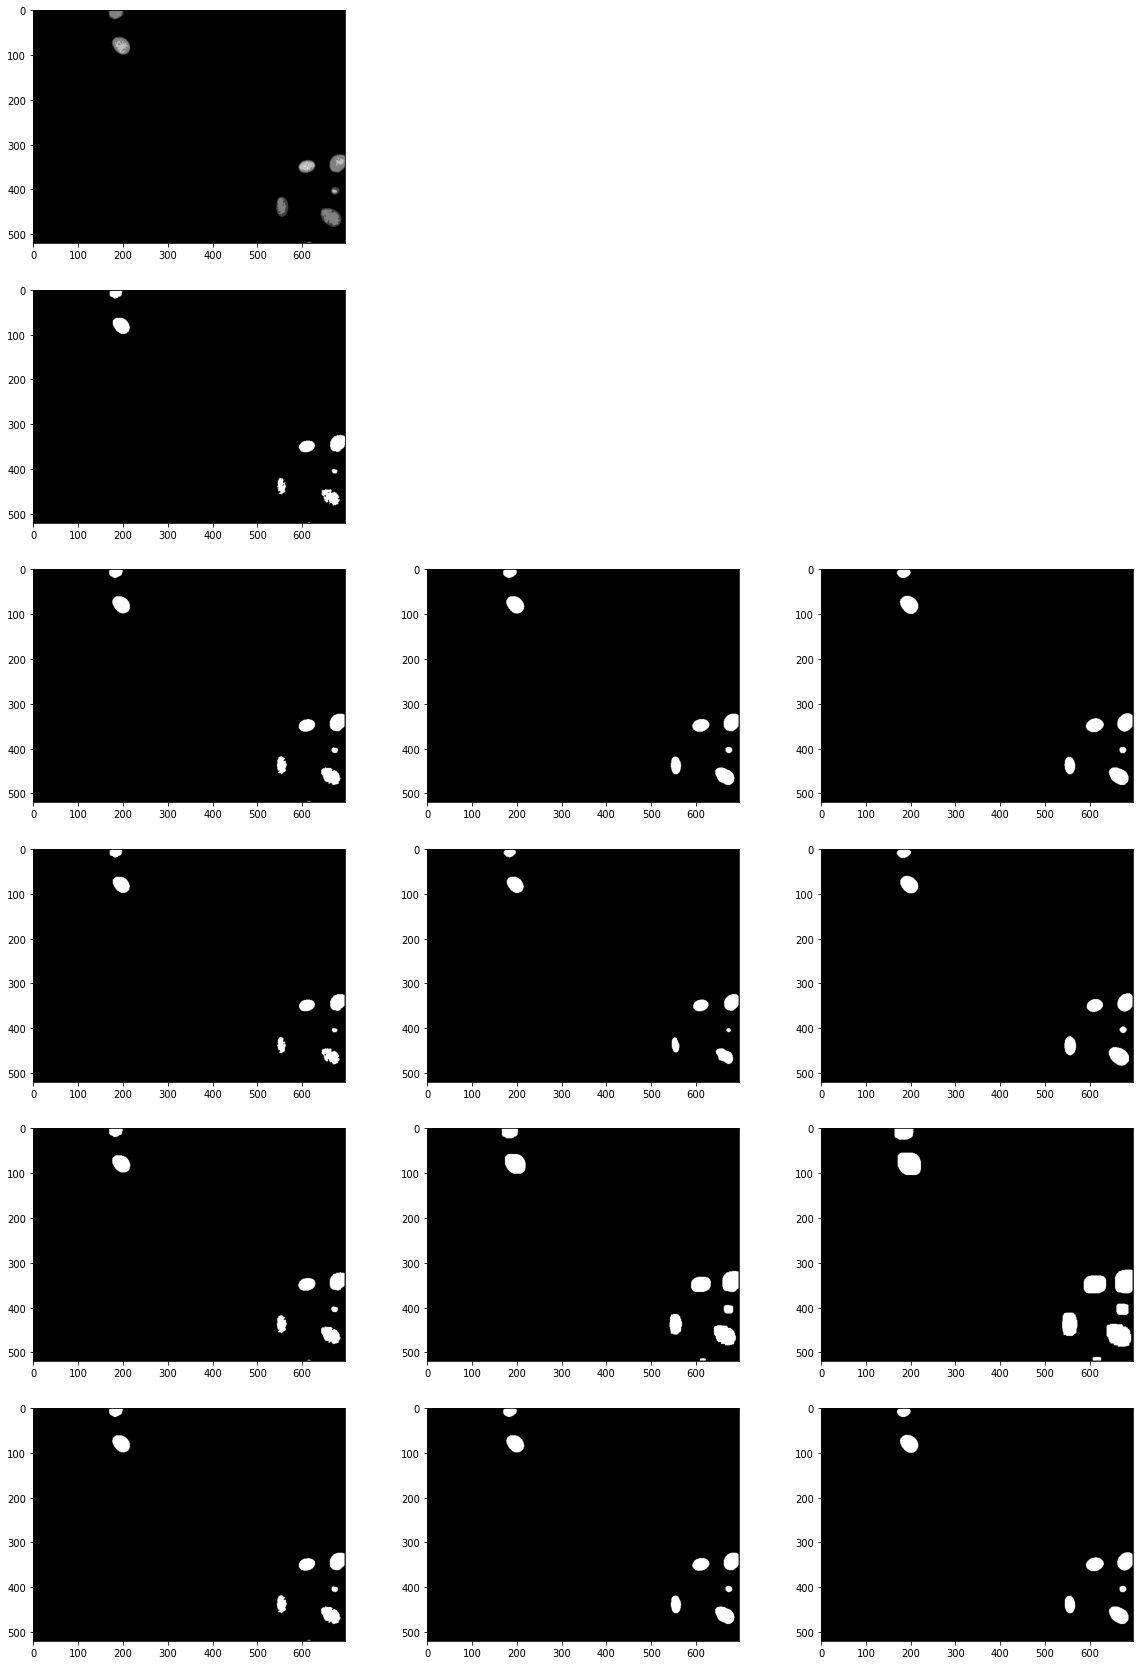

In [56]:
plot_figs(82)

### Ex 3:

**● Dada a base de imagens de células do exercício anterior, tente
realçar o núcleo e o contorno de cada célula:**

**– Use a derivada primeira e a segunda**

**– Caso seja necessário um filtro muito grande para ver alterações, reduza
a resolução da imagem para menos de 1000x1000 pixels.**

**● Implemente um filtro de realce das direções da primeira derivada.**

**● Use a informação dos gradientes nas bordas mais fortes para
tentar estimar qual é a direção predominante de gradientes em
cada imagem.**

Para realizar o realce foram utilizados os kernels 3x3 dos filtros de sobel vertical e horizontal (primeira derivada) e o kernel laplaciano (segunda derivada).

Para o sobel, após calcular as componentes vertical e horizontal, elas são utilizadas para calcular a magnitude, de acordo com a função descrita abaixo.

In [121]:
firts_derivative_y_kernel = np.array([[-1, 0,1],
                                      [-2, 0,2],
                                      [-1, 0,1]] )

firts_derivative_x_kernel = np.array([[-1,-2,-1],
                                      [ 0, 0, 0],
                                      [ 1, 2, 1]] )

laplacian_kernel = np.array( [ [-1,  -1, -1],
                               [-1,   8, -1],
                               [-1,  -1, -1]] )

def sobel_magnitude(sobel_x, sobel_y):
    return np.sqrt( sobel_x**2 + sobel_y**2 )

O código abaixo descreve os experimentos realizados.

Inicialmente as imagens foram suavizadas utilizando o filtro gaussiano com kernel 3x3, sendo aplicado então os filtros da primeira e segunda derivada. Para realçar a imagem, o resultado obtido é somado de maneira ponderada com a imagem original.

Para o sobel (primeira derivada), são calculadas as componentes horizontal e vertical, que são combinadas por meio do cálculo da magnitude, que é utilizado para realçar a imagem.

Por meio das componentes horizontal e vertical do sobel, foi calculado também a direção predominate do gradiente, que é listada abaixo do código para cada imagem.
Esse dado é calculado em radianos, e é uma média ponderada de acordo com a intensidade da magnitude de cada pixel do sobel, dessa forma, dando mais valor para os pixels de contorno mais forte.

In [138]:
i=0
for img_path in image_list:
    
    img_o = cv.imread(os.path.join('BBBC022_v1_images_20585w1',img_path),0)
    img_o = rescale(img_o, 0, 255)
    
    img_std  = img_o.std()

    gaussian_filter = (gaussian_kernel, np.sum, 'gaussian')

    msk = gaussian_kernel([3,3],img_std)
    
    img = correlation( img_o, msk )
    img = rescale(img, 0, 255)
    
    sobel_x = correlation( img, firts_derivative_x_kernel )
    plt.imsave('data/aula04/'+str(i)+'_sobelX.png', sobel_x, cmap='gray')
    
    sobel_y = correlation( img, firts_derivative_y_kernel )
    plt.imsave('data/aula04/'+str(i)+'_sobelY.png', sobel_y, cmap='gray')
    
    sobel_xy = sobel_magnitude(sobel_x, sobel_y)
    plt.imsave('data/aula04/'+str(i)+'_sobelM.png', sobel_xy, cmap='gray')
    
    laplacian = correlation( img, laplacian_kernel )
    plt.imsave('data/aula04/'+str(i)+'_laplacian.png', laplacian, cmap='gray')
    
    direction = np.arctan2(sobel_x.astype(float), sobel_y.astype(float))
    plt.imsave('data/aula04/'+str(i)+'_diretion.png', direction, cmap='gray')
    
    aug_sobel = img_o + 0.25*sobel_xy
    aug_sobel = rescale(aug_sobel, 0, 255)
    plt.imsave('data/aula04/'+str(i)+'_AugSobel.png', aug_sobel, cmap='gray')
    
    aug_lapacian = img_o +0.1*laplacian
    aug_lapacian = rescale(aug_lapacian, 0, 255)
    plt.imsave('data/aula04/'+str(i)+'_AugLaplacian.png', aug_lapacian, cmap='gray')
    
    n_sobel = rescale(sobel_xy, 0,1)
    
    direction_mean = np.sum(direction*n_sobel)/np.sum(n_sobel)
    
    print('Image',i,':',img_path, ':' ,direction_mean)
    i+=1

Image 0 : IXMtest_M17_s6_w1EB9C466A-D775-4D6F-A9D5-8C74CB22361B.tif : 0.01728501215147272
Image 1 : IXMtest_E08_s7_w1213F759E-5EA8-47EC-A584-85DF8EC1E280.tif : 0.031098960798436697
Image 2 : IXMtest_I07_s4_w108D066CC-9526-4136-B3CB-792D95EB9238.tif : 0.07191533950803806
Image 3 : IXMtest_L01_s2_w1E410C85B-4F1D-4390-AD41-771F43014096.tif : 0.06176689021306592
Image 4 : IXMtest_F18_s1_w17C3B7BFB-2727-4E84-91C5-5ABF12B75323.tif : 0.015133580274444433
Image 5 : IXMtest_A24_s5_w17F422E6E-C68D-47B2-9B86-F2A04C115CAC.tif : 0.062328621210664924
Image 6 : IXMtest_P17_s4_w1F0DD42D3-817D-4CFD-96E8-CC99AA3C28A5.tif : 0.02416771482668641
Image 7 : IXMtest_G23_s8_w15F532275-EC91-40B0-B4C0-32051862C2A0.tif : 0.02955903033436957
Image 8 : IXMtest_B11_s9_w14D667B23-B2EC-414F-AD9D-142EFA84A9CB.tif : 0.03290532828086053
Image 9 : IXMtest_B14_s8_w1A791F069-F91B-4865-81A9-F35968863F3D.tif : 0.011265827052368754
Image 10 : IXMtest_G06_s2_w1F2991779-6701-4C0A-B943-035EB0714636.tif : 0.08734933047877921
Image

Image 90 : IXMtest_H03_s3_w196CE79AC-EF34-40A1-93D4-89C011D93DC4.tif : 0.061980117534982615
Image 91 : IXMtest_F18_s6_w11CEC05FE-7BFE-4B10-9F89-7C635E896DAF.tif : 0.00971912871269823
Image 92 : IXMtest_O03_s7_w1BE1F0B58-DA2F-4540-AD3D-4974A455959D.tif : 0.033680655346495746
Image 93 : IXMtest_E18_s7_w1DDD2319C-AB26-493B-9B67-4829A643D0BE.tif : 0.06655462553448897
Image 94 : IXMtest_C05_s8_w107F7046C-2D5A-4CFD-BAC7-61A9B53474D4.tif : 0.029006149608230395
Image 95 : IXMtest_G03_s9_w1ECA5C16F-DA04-4DB8-B45C-A297700F6A84.tif : 0.00045039923866231147
Image 96 : IXMtest_B19_s5_w10E82D16F-E76C-4D13-B5E5-FA59A2541083.tif : 0.08542755032926372
Image 97 : IXMtest_O11_s5_w18D446745-068B-4DB0-A3A5-7726D744D224.tif : 0.0820884129815061
Image 98 : IXMtest_M11_s2_w19749CB2E-5A65-4DEF-94E6-BB7B96DC2283.tif : 0.10091322657652024
Image 99 : IXMtest_I22_s6_w1826A8B99-B546-47DF-A91E-4025C738FB69.tif : 0.013393152062073272


A primeira linha da figura abaixo mostra uma imagem ao lado da sua versão realçada com o sobel, a segunda linha mostra as componentes x e y do sobel e a ultima linha mostra a magnitude.

In [81]:
def plot_figs_sobel(j):
    fig = plt.figure(figsize=(10, 30))

    i=1
    img = cv.imread( 'data/aula04/Original/'+str(j)+'_nimg.png' ,0)
    fig.add_subplot(6, 2, i)
    plt.imshow(img, cmap='gray')
    i+=1

    for types in [ 'AugSobel', 'sobelX', 'sobelY', 'sobelM']:
        img_path = 'data/aula04/realce/'+str(j)+'_'+types+'.png'
        img = cv.imread( img_path ,0)
        fig.add_subplot(6, 2, i)
        plt.imshow(img, cmap='gray')
        i+=1

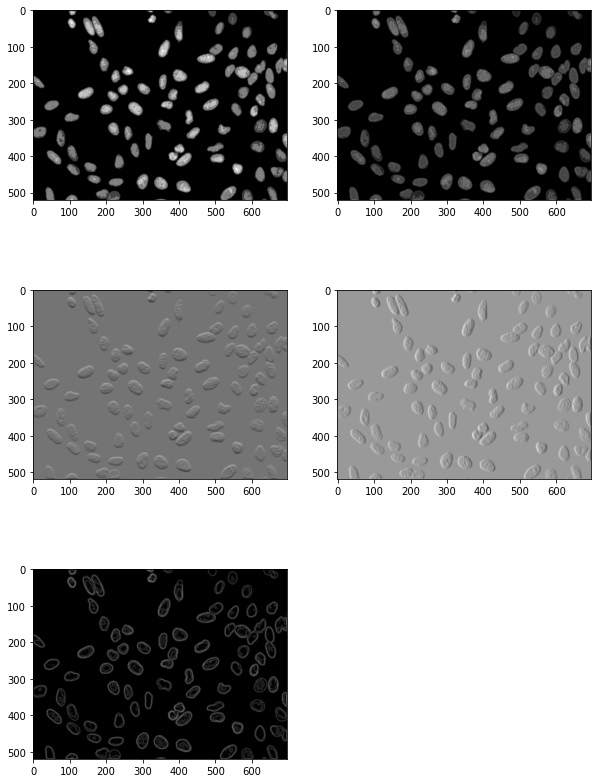

In [82]:
plot_figs_sobel(3)

A primeira linha da figura abaixo mostra uma imagem ao lado da sua versão realçada com o laplaciano e a segunda linha mostra o laplacino.

In [79]:
def plot_figs_laplacian(j):
    fig = plt.figure(figsize=(10, 30))

    i=1
    img = cv.imread( 'data/aula04/Original/'+str(j)+'_nimg.png' ,0)
    fig.add_subplot(6, 2, i)
    plt.imshow(img, cmap='gray')
    i+=1

    for types in [ 'AugLaplacian', 'laplacian']:
        img_path = 'data/aula04/realce/'+str(j)+'_'+types+'.png'
        img = cv.imread( img_path ,0)
        fig.add_subplot(6, 2, i)
        plt.imshow(img, cmap='gray')
        i+=1

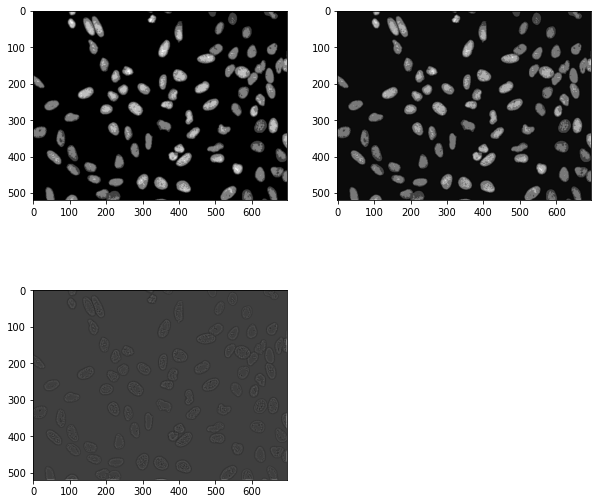

In [80]:
plot_figs_laplacian(3)

A figura abaixo mostra a imagem original (primeira coluna) ao lado da imagem realçada com o sobel (segunda coluna) e a imgem realçada com o laplaciano(terceira coluna) para 4 imagem do conjunto de dados (imagens 3, 8, 65 e 82).

É possível verificar que tanto o sobel quanto o laplaciano foram capazes de realçar os contornos da célula e do núcleo, sendo o destaque realizado pelo sobel um pouco mais visivel.

In [77]:
def plot_figs_sobelxlaplacian(index):
    fig = plt.figure(figsize=(20, 20))
    i=1
    for j in index:
        img = cv.imread( 'data/aula04/Original/'+str(j)+'_nimg.png' ,0)
        fig.add_subplot(len(index), 3, i)
        plt.imshow(img, cmap='gray')
        i+=1

        for types in [ 'AugSobel', 'AugLaplacian']:
            img_path = 'data/aula04/realce/'+str(j)+'_'+types+'.png'
            img = cv.imread( img_path ,0)
            fig.add_subplot(len(index), 3, i)
            plt.imshow(img, cmap='gray')
            i+=1

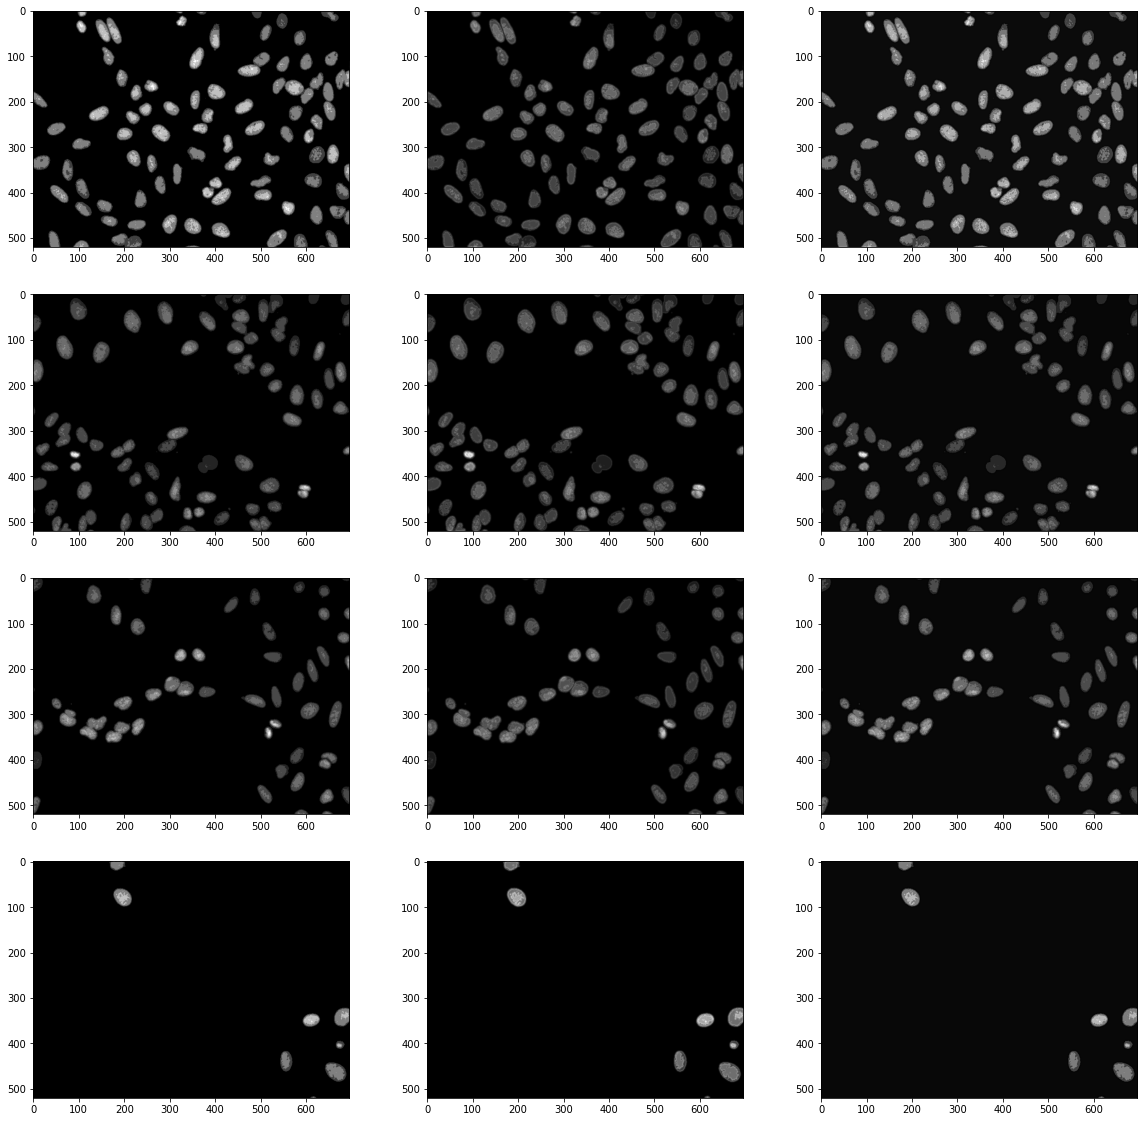

In [78]:
plot_figs_sobelxlaplacian([3,8,65,82])

A figura abaixo mostra a imagem original ao lado da imagem gerada por meio da direção calculada por meio das compoentes vertical e horizontal do sobel para as imagens 3, 8, 65 e 82 do conjunto de dados.

É possível verificar que foi gerado uma imagem que representa em relevo as direções do gradiente de cada pixel.

In [90]:
def plot_figs_direction(index):
    fig = plt.figure(figsize=(10, 15))
    i=1
    for j in index:
        img = cv.imread( 'data/aula04/Original/'+str(j)+'_nimg.png' ,0)
        fig.add_subplot(len(index), 2, i)
        plt.imshow(img, cmap='gray')
        i+=1

        img_path = 'data/aula04/realce/'+str(j)+'_diretion.png'
        img = cv.imread( img_path ,0)
        fig.add_subplot(len(index), 2, i)
        plt.imshow(img, cmap='gray')
        i+=1

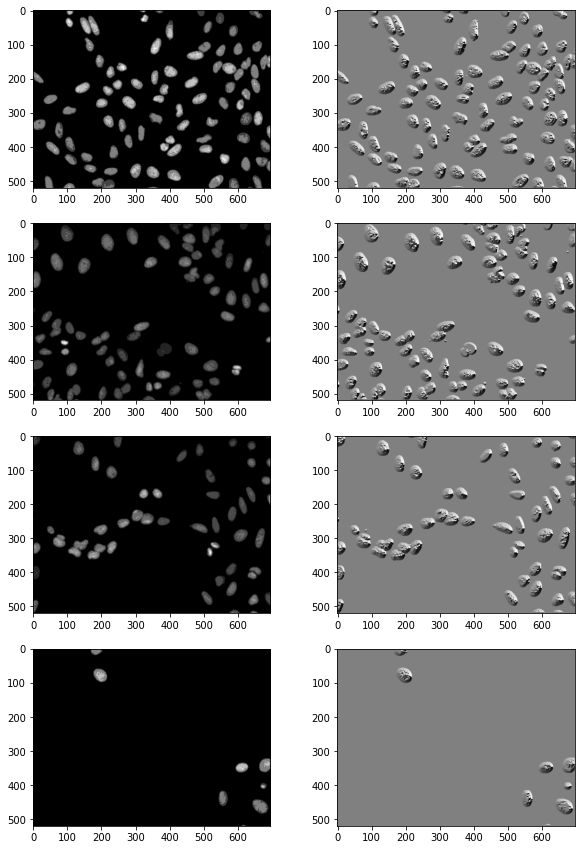

In [91]:
plot_figs_direction([3,8,65,82])